In [2]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini")
model.invoke("Hello, world!")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 11, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CTRDM8I1VjZgj64a8cMP0QlgTltOI', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--c97e4dcf-7342-4fbb-ba68-0c8b5680635e-0', usage_metadata={'input_tokens': 11, 'output_tokens': 9, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [14]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    """
    State 클래스는 TypedDict를 상속받아 상태의 구조를 정의합니다.
    
    속성:
        messages (Annotated[list[str], add_messages]): 메세지들은 'list' 타입을 가집니다.
        'add_messages' 함순는 이 상태 키가 어떻게 업데이트되어야 하는지를 정의합니다.
        (이경우, 메세지를 덮어쓰는 대신 리스트에 추가합니다.)
    """
    messages: Annotated[list[str], add_messages]

graph_builder = StateGraph(State)

In [15]:
def generate(state: State):
    """
        주어진 상태를 기반으로 챗봇의 응답 메세지를 생성합니다.

        매개변수:
        state (State) : 현재 대화 상태를 나타내는 객체로, 이전 메세지들이 포함되어 있습니다.

        반환값:
        dict : 모델이 생성한 응답 메세지를 포함하는 딕셔너리.
                형식은 {"messages:" [model.invoke(state["messages")]})]}
    """
    return {"messages": [model.invoke(state["messages"])]} 

graph_builder.add_node("generate", generate)

graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate", END)

graph = graph_builder.compile()

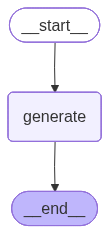

In [11]:
from IPython.display import display, Image

try:
    display(Image(graph.get_graph().draw_mermaid_png()))

except Exception:

    pass

In [12]:
response = graph.invoke({"messages":["안녕하세요! 오늘 날씨가 좋네요!"]})

print(type(response))

response

<class 'dict'>


{'messages': [HumanMessage(content='안녕하세요! 오늘 날씨가 좋네요!', additional_kwargs={}, response_metadata={}, id='48fe4cfd-f3b0-4fbf-9c6a-ad0cf9727459'),
  AIMessage(content='안녕하세요! 날씨가 좋다니 기쁘네요! 오늘 어떤 계획이 있으신가요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 17, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CTRfS2CQEU2zcng4S7SNNr7nrzeHe', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--6c41c1c2-7503-4979-bac8-a560e866f5c5-0', usage_metadata={'input_tokens': 17, 'output_tokens': 22, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 're

In [13]:
response['messages'].append("오늘날씨가 어떨까요?")

graph.invoke(response)

{'messages': [HumanMessage(content='안녕하세요! 오늘 날씨가 좋네요!', additional_kwargs={}, response_metadata={}, id='48fe4cfd-f3b0-4fbf-9c6a-ad0cf9727459'),
  AIMessage(content='안녕하세요! 날씨가 좋다니 기쁘네요! 오늘 어떤 계획이 있으신가요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 17, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CTRfS2CQEU2zcng4S7SNNr7nrzeHe', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--6c41c1c2-7503-4979-bac8-a560e866f5c5-0', usage_metadata={'input_tokens': 17, 'output_tokens': 22, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 're

In [25]:
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()
config = {"configurable" : {'thread_id':"abcd"}}

graph = graph.builder.compile(checkpointer=memory)

while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        break
    for event in graph.stream({"messages":[HumanMessage(user_input)]},config, stram_mode="values"):
        event['generate']["messages"][-1].pretty_print()

    print(f'\n현재 메시지 개수:{len(event['generate']['messages'])}\n-----------------------\n')

================================== Ai Message ==================================

안녕하세요! 어떻게 도와드릴까요?

현재 메시지 개수:1
-----------------------

================================== Ai Message ==================================

오늘 날씨가 추운가 보네요. 따뜻하게 입고 다니세요! 혹시 날씨 정보나 준비물에 대해 더 알고 싶으신가요?

현재 메시지 개수:1
-----------------------

================================== Ai Message ==================================

죄송하지만, 실시간 날씨 정보를 제공할 수는 없습니다. 현재 위치에 따라 정확한 날씨를 확인하려면 기상청 웹사이트나 날씨 앱을 이용해 보시는 것이 좋습니다. 다른 질문이나 도움이 필요하시면 말씀해 주세요!

현재 메시지 개수:1
-----------------------

================================== Ai Message ==================================

프로그램을 종료하고 싶으신 것인가요? 다른 질문이나 도움이 필요하시면 언제든지 말씀해 주세요!

현재 메시지 개수:1
-----------------------

================================== Ai Message ==================================

"exut"라는 단어는 잘못 입력된 것 같습니다. "exit"로 하려고 하셨던 것인가요? 아니면 다른 의미를 원하셨나요? 더 궁금한 점이 있다면 말씀해 주세요!

현재 메시지 개수:1
-----------------------

